In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("inflation-consumer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014 entries, 0 to 11013
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11014 non-null  object 
 1   Country Code  11014 non-null  object 
 2   Year          11014 non-null  int64  
 3   Inflation     11014 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 344.3+ KB


In [5]:
df.describe()

,Year,Inflation
count,11014.000000,11014.000000
mean,1992.209551,27.776900
std,15.302514,384.965429
min,1961.000000,-98.703831
25%,1980.000000,2.502159
50%,1994.000000,5.680057
75%,2005.000000,10.827582
max,2016.000000,26762.018330


In [17]:
df_USA = df[df["Country Code"] == "USA"]

<AxesSubplot:xlabel='Year', ylabel='Inflation'>

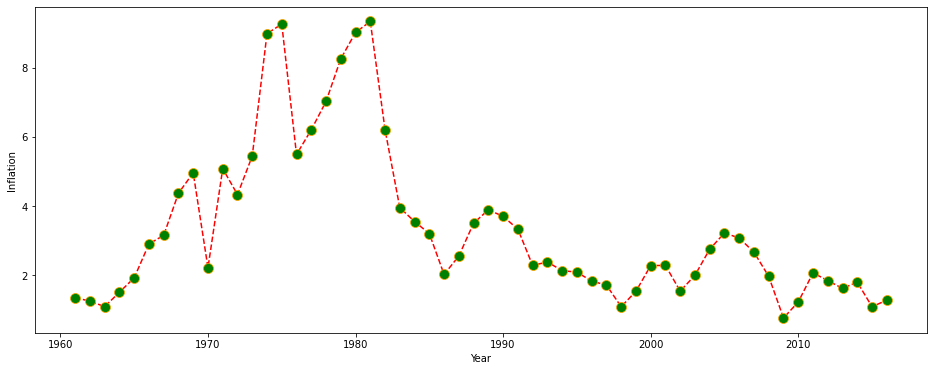

In [31]:
plt.figure(figsize=(16,6))
sns.lineplot(x = "Year", y="Inflation", data=df_USA, marker = "o", ms = 10, mfc ="g", ls = "--", color = "red", mec = "orange")

In [32]:
from pandas_datareader import data as dt

In [51]:
sandP500 = pd.DataFrame(dt.DataReader(name="^GSPC", data_source="yahoo", start="1961-1-1")["Adj Close"])

In [52]:
sandP500

,Adj Close
Date,
1961-01-03,57.570000
1961-01-04,58.360001
1961-01-05,58.570000
1961-01-06,58.400002
1961-01-09,58.810001
...,...
2022-06-06,4121.430176
2022-06-07,4160.680176
2022-06-08,4115.770020


In [53]:
sandP500["year"] = [x.year for x in sandP500.index]

In [54]:
sandP500["dr"] = sandP500["Adj Close"].pct_change()

In [57]:
sandP500.tail(5)

,Adj Close,year,dr
Date,,,
2022-06-06,4121.430176,2022,0.003137
2022-06-07,4160.680176,2022,0.009523
2022-06-08,4115.770020,2022,-0.010794
2022-06-09,4017.820068,2022,-0.023799
2022-06-10,3900.860107,2022,-0.029110


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

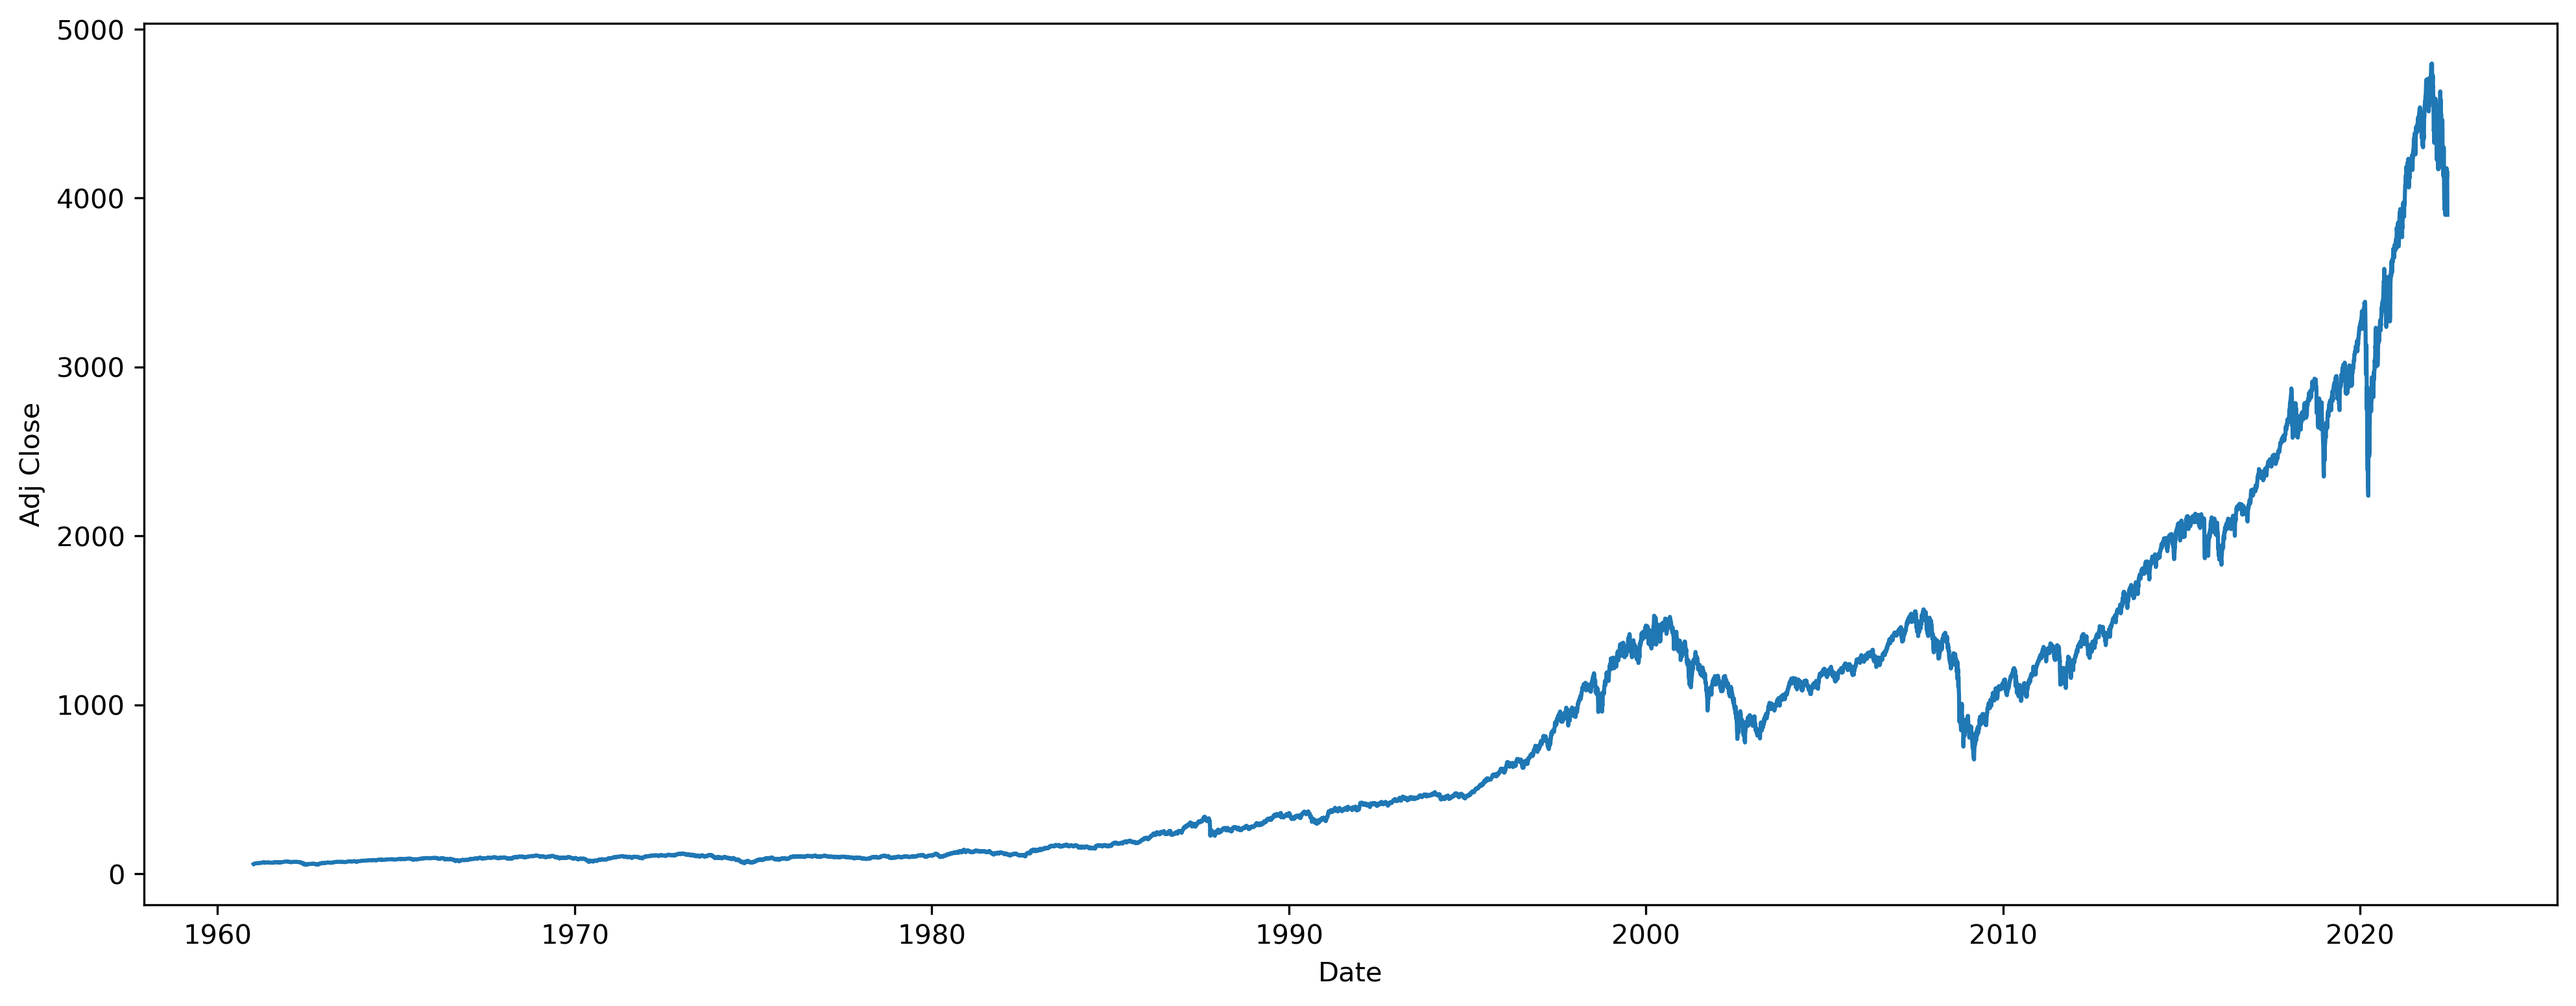

In [61]:
plt.figure(figsize=(16,6), dpi = 300)
sns.lineplot(x = sandP500.index, y = "Adj Close", data=sandP500)